In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt 
import random

In [2]:
print(f"tensorflow: {tf.__version__}")

tensorflow: 2.12.0


# 1. Load data

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_train.dtype, y_train.dtype

(dtype('uint8'), dtype('uint8'))

In [6]:
y_train[0]

9

In [7]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
class_nums = len(class_names)

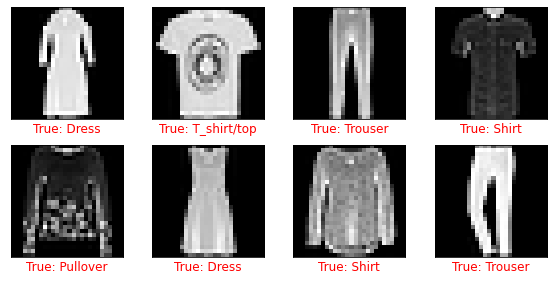

In [9]:
def plot_data(x_data: np.ndarray, y_data: np.ndarray) -> None:
    nrows, ncols = 2, 4
    fig, axes = plt.subplots(nrows, ncols, figsize=(8,4))
    
    for idx in range(ncols*nrows):
        ax = axes[idx//ncols, idx%ncols]
        img_idx = random.randint(0, len(x_data))
        ax.imshow(x_data[img_idx], cmap='gray')
        ax.set(xticks=[], yticks=[])
        
        true_label_str = f"True: {class_names[y_data[img_idx]]}"
        ax.set_xlabel(true_label_str, color='red', fontsize=12)
    
    plt.tight_layout()
    plt.show()
        
plot_data(X_train, y_train)

# 2. Image Pre-processing

- Reshaping it into the shape the model expects and scaling it so that all values are in the `[0, 1]` interval
- Transform from `uint8` to `float32`
- 

In [10]:
# Convert to float32 & scale images to the [0, 1] range for training
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

In [11]:
X_train.dtype, X_test.dtype

(dtype('float32'), dtype('float32'))

In [12]:
X_train = np.expand_dims(X_train, axis = -1)
X_test = np.expand_dims(X_test, axis = -1)

In [13]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [14]:
y_train_label = keras.utils.to_categorical(y_train, class_nums)
y_test_label = keras.utils.to_categorical(y_test, class_nums)

In [15]:
y_train[0], y_train_label[0]

(9, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32))

 # 3. Network Architecture

In [16]:
input_shape = (28,28,1)

In [17]:
model = keras.models.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(class_nums, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
